In [1]:
import logging
logger = logging.getLogger(__name__)

import sys
import os
import pandas as pd

### Generating dataset with first 1000 trips

In [82]:
cwd = os.getcwd()
#data_directory = os.path.join(os.path.dirname(cwd), 'data')
data_directory = os.path.join(cwd, 'data')
data_filepath = os.path.join(data_directory, 'train_1000.csv')

df = pd.read_csv(data_filepath)
print(df.head())

   Unnamed: 0              TRIP_ID CALL_TYPE  ORIGIN_CALL  ORIGIN_STAND  \
0           0  1372636858620000589         C          NaN           NaN   
1           1  1372637303620000596         B          NaN           7.0   
2           2  1372636951620000320         C          NaN           NaN   
3           3  1372636854620000520         C          NaN           NaN   
4           4  1372637091620000337         C          NaN           NaN   

    TAXI_ID   TIMESTAMP DAY_TYPE  MISSING_DATA  \
0  20000589  1372636858        A         False   
1  20000596  1372637303        A         False   
2  20000320  1372636951        A         False   
3  20000520  1372636854        A         False   
4  20000337  1372637091        A         False   

                                            POLYLINE  
0  [[-8.618643,41.141412],[-8.618499,41.141376],[...  
1  [[-8.639847,41.159826],[-8.640351,41.159871],[...  
2  [[-8.612964,41.140359],[-8.613378,41.14035],[-...  
3  [[-8.574678,41.151951],[-

In [88]:
class Trip(object):
    def __init__(self, named_tuple):
        fields = named_tuple._fields
        i = 0
        for val in named_tuple:
            setattr(self, fields[i], val)
            i+=1

class Trips(object):
    def __init__(self, filepath: str):
        self.filepath = filepath
        self.trips = []

    def load(self):
        if self.filepath != '':
            data = pd.read_csv(self.filepath)
        
        for row in data.itertuples():
            trip = Trip(row)
            self.trips.append(trip)

In [89]:
trips = Trips(data_filepath)
trips.load()

In [91]:
trips.trips[0].POLYLINE

'[[-8.618643,41.141412],[-8.618499,41.141376],[-8.620326,41.14251],[-8.622153,41.143815],[-8.623953,41.144373],[-8.62668,41.144778],[-8.627373,41.144697],[-8.630226,41.14521],[-8.632746,41.14692],[-8.631738,41.148225],[-8.629938,41.150385],[-8.62911,41.151213],[-8.629128,41.15124],[-8.628786,41.152203],[-8.628687,41.152374],[-8.628759,41.152518],[-8.630838,41.15268],[-8.632323,41.153022],[-8.631144,41.154489],[-8.630829,41.154507],[-8.630829,41.154516],[-8.630829,41.154498],[-8.630838,41.154489]]'

In [93]:
eval(df.loc[:, 'POLYLINE'][10])

[[-8.619894, 41.148009],
 [-8.620164, 41.14773],
 [-8.62065, 41.148513],
 [-8.62092, 41.150313],
 [-8.621208, 41.151951],
 [-8.621118, 41.153517],
 [-8.620884, 41.155416],
 [-8.620938, 41.155479],
 [-8.620974, 41.155461],
 [-8.621028, 41.155461],
 [-8.619777, 41.155344],
 [-8.619282, 41.155335],
 [-8.618112, 41.155101],
 [-8.61534, 41.154579],
 [-8.613297, 41.153994],
 [-8.612064, 41.153832],
 [-8.611911, 41.155227],
 [-8.611794, 41.156838],
 [-8.610804, 41.157171],
 [-8.61021, 41.15727],
 [-8.609508, 41.157333],
 [-8.60949, 41.157351]]

In [42]:
df.columns

Index(['Unnamed: 0', 'TRIP_ID', 'CALL_TYPE', 'ORIGIN_CALL', 'ORIGIN_STAND',
       'TAXI_ID', 'TIMESTAMP', 'DAY_TYPE', 'MISSING_DATA', 'POLYLINE'],
      dtype='object')

In [76]:
df.columns

Index(['Unnamed: 0', 'TRIP_ID', 'CALL_TYPE', 'ORIGIN_CALL', 'ORIGIN_STAND',
       'TAXI_ID', 'TIMESTAMP', 'DAY_TYPE', 'MISSING_DATA', 'POLYLINE'],
      dtype='object')

In [83]:
tup = df.itertuples()

In [84]:
test = next(tup)

In [87]:
for val in test:
    print(val)

0
0
1372636858620000589
C
nan
nan
20000589
1372636858
A
False
[[-8.618643,41.141412],[-8.618499,41.141376],[-8.620326,41.14251],[-8.622153,41.143815],[-8.623953,41.144373],[-8.62668,41.144778],[-8.627373,41.144697],[-8.630226,41.14521],[-8.632746,41.14692],[-8.631738,41.148225],[-8.629938,41.150385],[-8.62911,41.151213],[-8.629128,41.15124],[-8.628786,41.152203],[-8.628687,41.152374],[-8.628759,41.152518],[-8.630838,41.15268],[-8.632323,41.153022],[-8.631144,41.154489],[-8.630829,41.154507],[-8.630829,41.154516],[-8.630829,41.154498],[-8.630838,41.154489]]


In [86]:
test._fields

('Index',
 '_1',
 'TRIP_ID',
 'CALL_TYPE',
 'ORIGIN_CALL',
 'ORIGIN_STAND',
 'TAXI_ID',
 'TIMESTAMP',
 'DAY_TYPE',
 'MISSING_DATA',
 'POLYLINE')

In [61]:
for i in range(len(test)):
    next(test)

TypeError: 'Pandas' object is not an iterator

In [52]:
for item in test:
    print(item.__name__)

AttributeError: 'int' object has no attribute '__name__'

In [10]:
df.loc[:, 'TRIP_ID'].unique().shape

(1710589,)

In [13]:
df.loc[:999,:].to_csv('train_1000.csv')

In [38]:
import json
import os
import osmnx as ox

import sys
import os
import pandas as pd
import json
import osmnx as ox
from shapely.geometry import shape
from shapely.geometry.polygon import Polygon

class RoadNetwork(object):
    def __init__(self):
        self.graph = None
    
    def from_polygon(self, filepath: str):
        geojson = GeoJson(filepath)
        geojson.load()
        polygon = geojson.boundary_polygon
        self.graph = ox.graph_from_polygon(polygon, network_type='drive')

    def to_shapefile_directional(self, directory, encoding="utf-8"):
        # default filepath if none was provided
        #if filepath is None:
        #    filepath = os.path.join(ox.settings.data_folder, "graph_shapefile")

        # if save folder does not already exist, create it (shapefiles
        # get saved as set of files)
        if not directory == "" and not os.path.exists(directory):
            os.makedirs(directory)
        filepath_nodes = os.path.join(directory, "nodes.shp")
        filepath_edges = os.path.join(directory, "edges.shp")

        # convert undirected graph to gdfs and stringify non-numeric columns
        gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(self.graph)
        gdf_nodes = ox.io._stringify_nonnumeric_cols(gdf_nodes)
        gdf_edges = ox.io._stringify_nonnumeric_cols(gdf_edges)
        print(gdf_edges)
        # We need an unique ID for each edge
        gdf_edges["fid"] = gdf_edges.index.map('_'.join)
        
        # save the nodes and edges as separate ESRI shapefiles
        gdf_nodes.to_file(filepath_nodes, encoding=encoding)
        gdf_edges.to_file(filepath_edges, encoding=encoding)


class GeoJson(object):
    def __init__(self, filepath: str):
        self.filepath = filepath
        self.data = None

    def load(self):
        if self.filepath != '':
            with open(self.filepath, 'r') as f:
                self.data = json.load(f)
        else:
            raise ValueError('`filepath` missing...')

    @property
    def boundary_polygon(self):
        if not self.data is None:
            return shape(self.data['geometries'][0])

In [39]:
datapath = os.path.join(os.getcwd(), 'data')
filepath = os.path.join(datapath, 'porto.geojson')
road_network = RoadNetwork()
road_network.from_polygon(filepath)
#road_network.to_shapefile_directional(datapath)



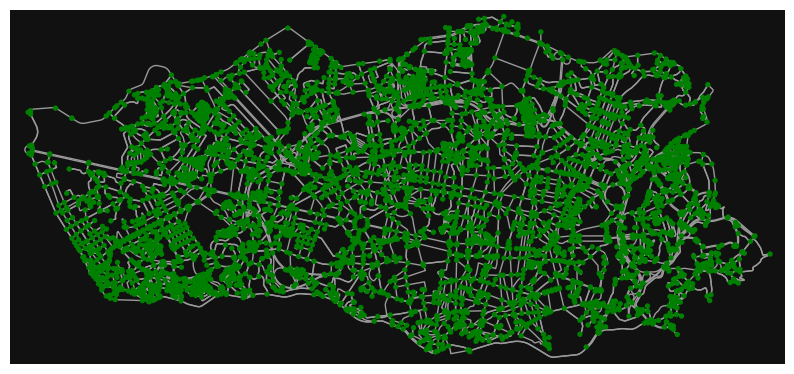

(<Figure size 1000x1000 with 1 Axes>, <AxesSubplot:>)

In [40]:
ox.plot_graph(road_network.graph, figsize=(10, 10), bgcolor='#111111', node_color='g')

In [94]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [95]:
for c in mcolors.TABLEAU_COLORS:
    print(c)


tab:blue
tab:orange
tab:green
tab:red
tab:purple
tab:brown
tab:pink
tab:gray
tab:olive
tab:cyan


In [97]:
print(type(mcolors.TABLEAU_COLORS))

<class 'dict'>


In [98]:
mcolors.TABLEAU_COLORS.items()

dict_items([('tab:blue', '#1f77b4'), ('tab:orange', '#ff7f0e'), ('tab:green', '#2ca02c'), ('tab:red', '#d62728'), ('tab:purple', '#9467bd'), ('tab:brown', '#8c564b'), ('tab:pink', '#e377c2'), ('tab:gray', '#7f7f7f'), ('tab:olive', '#bcbd22'), ('tab:cyan', '#17becf')])